In [ ]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Practical introduction to Python and Numpy
<article class="message">
    <div class="message-body">
        <strong>Overview of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#norm">Task 1: Vector length</a>
            </li>
            <li>
            <a href="#comprehensions">Task 2: List comprehensions</a>
            </li>
            <li>
            <a href="#dotproduct">Task 3: Inner product</a>
            </li>
            <li>
            <a href="#indexing">Task 4: Array indexing</a>
            </li>
            <li>
            <a href="#norm_np">Task 5: Length using numpy</a>
            </li>
            <li>
            <a href="#angle">Task 6: Calculating angles</a>
            </li>
            <li>
            <a href="#distances">Task 7: Distances - continued</a>
            </li>
        </ul>
    </div>
</article>

## Using native types in Python to implement basic linear algebra operations
The vectors `va`
 and `vb`
 are defined as:


In [1]:
va = [2, 2]
vb = [3, 4]

#### Vector length
The length (L2-norm) of a vector is defined as

$$||v|| = \sqrt{\sum_{i=1}^N v_i^2}.$$
<article class="message task"><a class="anchor" id="norm"></a>
    <div class="message-header">
        <span>Task 1: Vector length</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


</div></article>



In [12]:
# L2-norm, or length, of a vector:
def length(v):
    sum = 0
    for i in v:
        sum += i**2
    return sum**0.5


print('a', length(va))
print('b', length(vb))
assert length(va) == 8**0.5
assert length(vb) == 5

a 2.8284271247461903
b 5.0


#### List comprehensions
A list comprehension has the following form
```python
[f(e) for e in list]
```

where $f$ is an arbitrary function applied to each element $e$.  This 
is equivalent to the `map` function in functional programming. 



In [13]:
# L2-norm as for comprehension
def length2(v):
    return sum([e**2 for e in v]) ** 0.5

print('a', length2(va))
print('b', length2(vb))
assert length2(va) == 8**0.5
assert length2(vb) == 5

a 2.8284271247461903
b 5.0



The definition of the dot product:

$$
a\cdot b = \sum_{i=1}^N a_ib_i.
$$
where $a$ and $b$ are $n$-dimensional vectors.


In [11]:
def dot(a, b):
    sum = 0
    for i, j in zip(a, b):
        sum += i * j
    print(sum)
    return sum

# Tests
assert dot(va, vb) == 14

14


#### Numpy
Numpy makes it way easier to work with multidimensional arrays and provides a significant performance increase when operating on arrays.



In [6]:
import numpy as np

A = np.array([
    [1, 2, 3],
    [3, 4, 9],
    [5, 7, 3]
])

Use `A.shape` to get the dimensions (size) of the array.


In [7]:
A.shape

(3, 3)

## Slicing
Slicing allows you to select a subarray of elements using the `<start>:<stop>`
 notation, e.g. `0:2`
. Inspect the code cell below for a few examples:


In [9]:
print('A', A)

single = A[0]
print('single element', single)

vector = A[:2, 1] # 0's can be ommitted.
print('vector of elements', vector)

matrix = A[:, :2]
print('matrix of elements\n', matrix)

A [[1 2 3]
 [3 4 9]
 [5 7 3]]
single element [1 2 3]
vector of elements [2 4]
matrix of elements
 [[1 2]
 [3 4]
 [5 7]]


Negative indices are equivalent to counting backwards from the end of the array, i.e. `-<idx>`

is equivalent to `len(a)-<idx>`
. A few examples:


In [16]:
print('A', A, '\n')

single = A[-1, -1]
print('single', single)

arange = A[0:-2, 0:-1]
print('arange', arange)

A [[1 2 3]
 [3 4 9]
 [5 7 3]] 

single 3
arange [[1 2]]


In [17]:
ur = A[:2, 1:]
row = A[1]
col = A[:, 0]

print('upper right\n', ur)
print('row', row)
print('column', col)

# Tests
assert np.all(ur == np.array([[2, 3], [4, 9]]))
assert np.all(row == np.array([3, 4, 9]))
assert np.all(col == np.array([1, 3, 5]))

upper right
 [[2 3]
 [4 9]]
row [3 4 9]
column [1 3 5]


---
## Use Numpy when possible, it's faster.


In [18]:
ta = np.random.randint(100, size=1000000)
tb = np.random.randint(100, size=1000000)

In [21]:
def length_np(v):
    return np.sum(v**2)**0.5

vec = np.array([2, 3, 4, 5])
length_np(vec)

np.float64(7.3484692283495345)

Compare the Python and Numpy implementations using an array of random numbers:


In [22]:
vr = np.random.randint(100, size=10000)

%timeit length_np(vr)
%timeit length(vr)
%timeit length2(vr)

7.69 μs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
690 μs ± 18.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
719 μs ± 11.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



### Angles between vectors
The angle between vectors $\mathbf{u}$ and $\mathbf{v}$ is described by the following relation (as will be presented in the lecture):

$$
\cos \theta = \frac{\mathbf{u}\cdot \mathbf{v}}{\|\mathbf{u}\|\|\mathbf{v}\|}
$$
or equivalently 

$$
\mathbf{u}\cdot \mathbf{v} = |\mathbf{u}\|\|\mathbf{v}\|\cos \theta 
$$


In [23]:
def angle(a, b):
    return np.arccos(np.dot(a,b)/(length_np(a)*length_np(b)))

a = np.array([2, 3, 4])
b = np.array([0, -1, 2])
print(angle(a, b)) # The result should be: 1.1426035712129559
assert angle(a, b) == 1.1426035712129559

1.1426035712129559


## Distances
The Euclidean distance between two vectors $\mathbf{a}$ and $\mathbf{b}$ is calculated as the length of the difference vector between $\mathbf{a}$ and $\mathbf{b}$, i.e. $\|\mathbf{a}-\mathbf{b}\|$.
<article class="message task"><a class="anchor" id="distances"></a>
    <div class="message-header">
        <span>Task 7: Distances</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Use the code cell below to create two-dimensional vectors $\mathbf{a}=\begin{bmatrix}0\\0\end{bmatrix}$ and $\mathbf{b}=\begin{bmatrix}1\\1\end{bmatrix}$ using `np.zeros`
 and `np.ones`
 (refer to the tutorial for inspiration).
2. Calculate the distance between the points and print the result.
3. Create n-dimensional vectors $\mathbf{a}=\begin{bmatrix}0\\\vdots\\0\end{bmatrix}$ and $\mathbf{b}=\begin{bmatrix}1\\\vdots\\1\end{bmatrix}$ using `np.zeros`
 and `np.ones`
 (refer to the tutorial for inspiration) for $n=1, \dots, 10$. Calculate the distance between the vectors for each number of dimensions. Plot the distances as a function of $n$.



</div></article>



1.4142135623730951


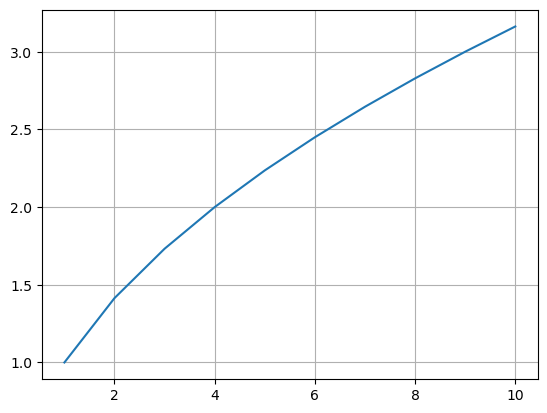

In [25]:
# Write your solution here
import matplotlib.pyplot as plt

a = np.zeros(2)
b = np.ones(2)
print(length_np(a-b))

l = [length_np(np.zeros(i) - np.ones(i)) for i in range(1,11)]

plt.plot(range(1,11),l)
plt.grid(True)
plt.show()


<article class="message task"><a class="anchor" id="distances"></a>
    <div class="message-header">
        <span>Task 8: Distances - continued</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


This task extends on the previous exercise.
1. Explain the relationship in the figure between the number of dimensions and the distance.
2. Derive a formula for the distance between $\mathbf{a}$ and $\mathbf{b}$ as a function of the number of dimensions $n$, i.e. $f(n)=?$



</div></article>

